In [1]:
import numpy as np
import pandas as pd
import cv2
import statistics
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [11]:
path = "../FER2013_ver2"
emotions = os.listdir(f"{path}/train")

train_image = []
train_emotion = []

for emotion in emotions:
    image_path = f"{path}/train/{emotion}"
    files = os.listdir(image_path)

    for file in files:
        img = cv2.imread(f"{image_path}/{file}")
        cv2.imshow('image', img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (48, 48))
        train_image.append(img)
        train_emotion.append(emotion)


test_image = []
test_emotion = []

for emotion in emotions:
    image_path = f"{path}/test/{emotion}"
    files = os.listdir(image_path)

    for file in files:
        img = cv2.imread(f"{image_path}/{file}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (48, 48))
        test_image.append(img)
        test_emotion.append(emotion)


train_image = np.array(train_image)
train_emotion = np.array(train_emotion)
train_image, train_emotion = shuffle(train_image, train_emotion, random_state=0)

test_image = np.array(test_image)
test_emotion = np.array(test_emotion)
test_image, test_emotion = shuffle(test_image, test_emotion, random_state=0)

### Distribution

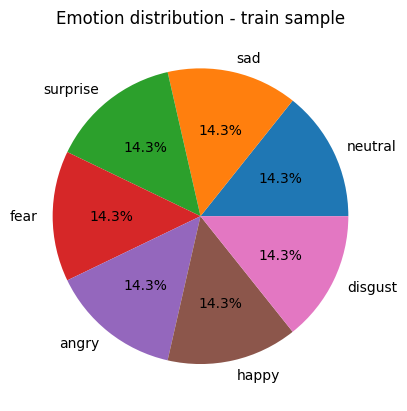

In [12]:
x_emotion = set(emotions)
y_emotion = [train_emotion[train_emotion==i].size for  i in x_emotion]
fig, ax = plt.subplots()
ax.pie((y_emotion), labels=(x_emotion), autopct='%1.1f%%')
plt.title('Emotion distribution - train sample')
plt.show()

Text(0.5, 1.0, 'Emotion distribution - test sample')

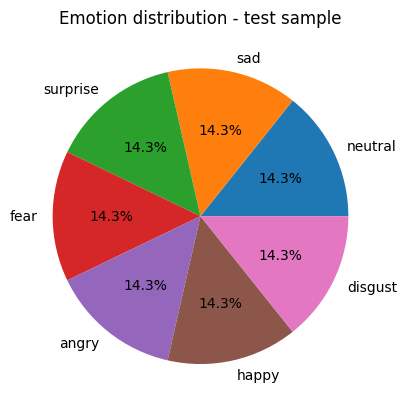

In [13]:
x_emotion = set(emotions)
y_emotion = [test_emotion[test_emotion==i].size for  i in x_emotion]
fig, ax = plt.subplots()
ax.pie((y_emotion), labels=(x_emotion), autopct='%1.1f%%')
plt.title('Emotion distribution - test sample')
# plt.show()

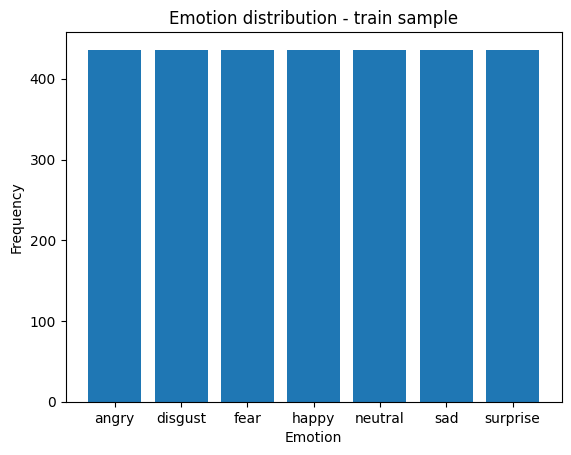

In [15]:
emotion_counts = [np.count_nonzero(train_emotion == e) for e in emotions]
fig, ax = plt.subplots()
ax.bar(emotions, emotion_counts)
ax.set_xlabel('Emotion')
ax.set_ylabel('Frequency')
ax.set_title('Emotion distribution - train sample')
plt.show()

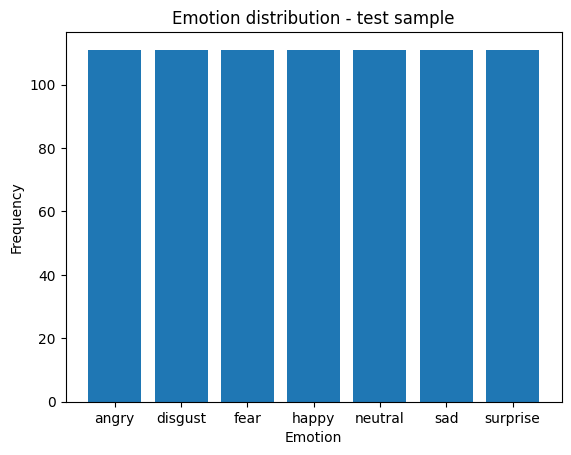

In [16]:
emotion_counts = [np.count_nonzero(test_emotion == e) for e in emotions]
fig, ax = plt.subplots()
ax.bar(emotions, emotion_counts)
ax.set_xlabel('Emotion')
ax.set_ylabel('Frequency')
ax.set_title('Emotion distribution - test sample')
plt.show()